#                **Black Friday Sales Predictions** 


# Overview
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

# Problem Statement
To build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

Problem: Predict purchase amount.

# About Dataset
Black Friday Sales 
This dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and expand your feature engineering skills and day to day understanding from multiple shopping experiences. This is a regression problem. The dataset has 550,068 rows and 12 columns.

Data Overview¶
Dataset has 550068 rows (transactions) and 12 columns (features) as described below:

# Features
User_ID: Unique ID of the user. There are a total of 5891 users in the dataset.

Product_ID: Unique ID of the product. There are a total of 3623 products in the dataset.

Gender: indicates the gender of the person making the transaction.

Age: indicates the age group of the person making the transaction.

Occupation: shows the occupation of the user, already labeled with numbers 0 to 20.

City_Category: User's living city category. Cities are categorized into 3 different categories 'A', 'B' and 'C'.

Stay_In_Current_City_Years: Indicates how long the users has lived in this city.

Marital_Status: is 0 if the user is not married and 1 otherwise.

Product_Category_1 to _3: Category of the product. All 3 are already labaled with numbers.

Purchase: Purchase amount.

# Loading Libraries

In [ ]:
# Importing Libraries

# Numpy for mathematical operations & Pandas for data manipulation and analysis
import numpy as np
import pandas as pd

# To check the data type we import 'is_string_dtype' and 'is_numeric_dtype'
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# Matplotlib for  data visualization 
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn is used for plotting statistical graphics
import seaborn as sns

# 
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing


from scipy.stats import shapiro
from scipy import stats

# Standard Scaler
from sklearn.preprocessing import StandardScaler

#SVM
from sklearn.svm import SVC
from sklearn import metrics

# SGDRegressor
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from numpy import random
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

# suppress the warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# Loading Dataset

In [ ]:
# Load the Data using read_csv function
df=pd.read_csv('/content/BlackFridaySaleDataset.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Description

In [ ]:
# Dimensions of Data ie Number of rows and columns
print('Shape of DataFrame: {}'.format(df.shape))

Shape of DataFrame: (550068, 12)


In [ ]:
# Additional Info about Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


As we can see there are missing values in Product_Category_2 and Product_Category_3, which we will treat them later.

In [ ]:
# Description of Dataset
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
# Check for unique Values
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [ ]:
# Value counts for City_Category column
df.City_Category.value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [ ]:
# Value counts for Age column
df.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [ ]:
# Value counts for Gender column
df.Gender.value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [ ]:
# Check for datatypes 
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

# EDA

In [ ]:
## Dropping column that is not required
df.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [ ]:
# Checking 
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969





### 1) Checking For Missing Value

In [ ]:
## Checking for missing value
df.isna().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

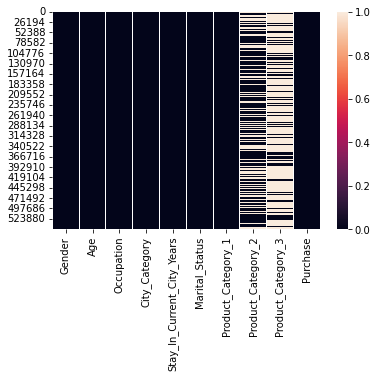

In [ ]:
## Heatmap shows missing value
sns.heatmap(df.isnull())


### 2)Treating Missing Value

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(pd.DataFrame(df['Product_Category_3']))
df['Product_Category_3'] = imputer.transform(pd.DataFrame(df['Product_Category_3']))
df['Product_Category_3'] = np.round(df['Product_Category_3'])

print("Product_Category_3 column imputed successfully")

Product_Category_3 column imputed successfully


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(pd.DataFrame(df['Product_Category_2']))
df['Product_Category_2'] = imputer.transform(pd.DataFrame(df['Product_Category_2']))
df['Product_Category_2'] = np.round(df['Product_Category_2'])

print("Product_Category_2 column imputed successfully")

Product_Category_2 column imputed successfully


In [ ]:
#Check for null values in the dataset
df.isna().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

### 3) Feature Handling

In [ ]:
# Info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


In [ ]:
## Handling categorical feature Gender
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,A,2,0,3,10.0,13.0,8370
1,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,0,0-17,10,A,2,0,12,10.0,13.0,1422
3,0,0-17,10,A,2,0,12,14.0,13.0,1057
4,1,55+,16,C,4+,0,8,10.0,13.0,7969


In [ ]:
#Handle categorical feature Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
# Creating new bins for Age group
# We have created 7 different Categories for Age Column
df['Age']=df['Age'].map({'0-17':1,
                       '18-25':2,
                        '26-35':3,
                        '36-45':4,
                        '46-50':5,
                        '51-55':6,
                         '55+':7})
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,A,2,0,3,10.0,13.0,8370
1,0,1,10,A,2,0,1,6.0,14.0,15200
2,0,1,10,A,2,0,12,10.0,13.0,1422
3,0,1,10,A,2,0,12,14.0,13.0,1057
4,1,7,16,C,4+,0,8,10.0,13.0,7969


In [ ]:
# Checking Value counts for City
df.City_Category.value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [ ]:
# Mapping City_Category with Objects(0,1,2) 
# For City_A :0 , For City_B :1 , For City_C :2 
df['City_Category']=df['City_Category'].map({'A':0,'B':1,'C':2})

In [ ]:
# Replacing Values
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [ ]:
# Conversion Datatype
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)


In [ ]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,0,2,0,3,10.0,13.0,8370
1,0,1,10,0,2,0,1,6.0,14.0,15200
2,0,1,10,0,2,0,12,10.0,13.0,1422
3,0,1,10,0,2,0,12,14.0,13.0,1057
4,1,7,16,2,4,0,8,10.0,13.0,7969


In [ ]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

### 4) Duplicate Rows

In [ ]:
duplicate = df[df.duplicated()]
duplicate.shape

(5281, 10)

In [ ]:
#remove duplicate rows in training dataset
df.drop_duplicates(keep='first',inplace=True)

# Visualisation

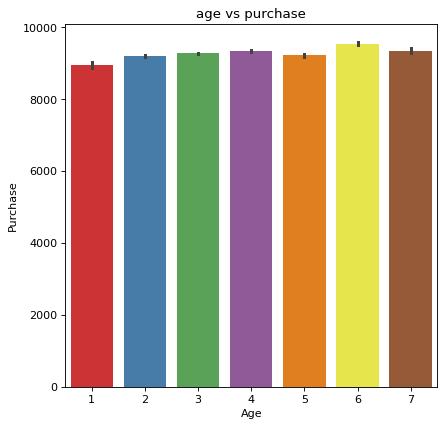

In [ ]:
# Age vs purshased
plt.figure(figsize=(6,6),dpi=80)
plt.title('age vs purchase')
sns.barplot(x='Age',y='Purchase',data=df,palette='Set1')

Here we understood that the purchase rate of old age is the highest and the lowest rate is of child.

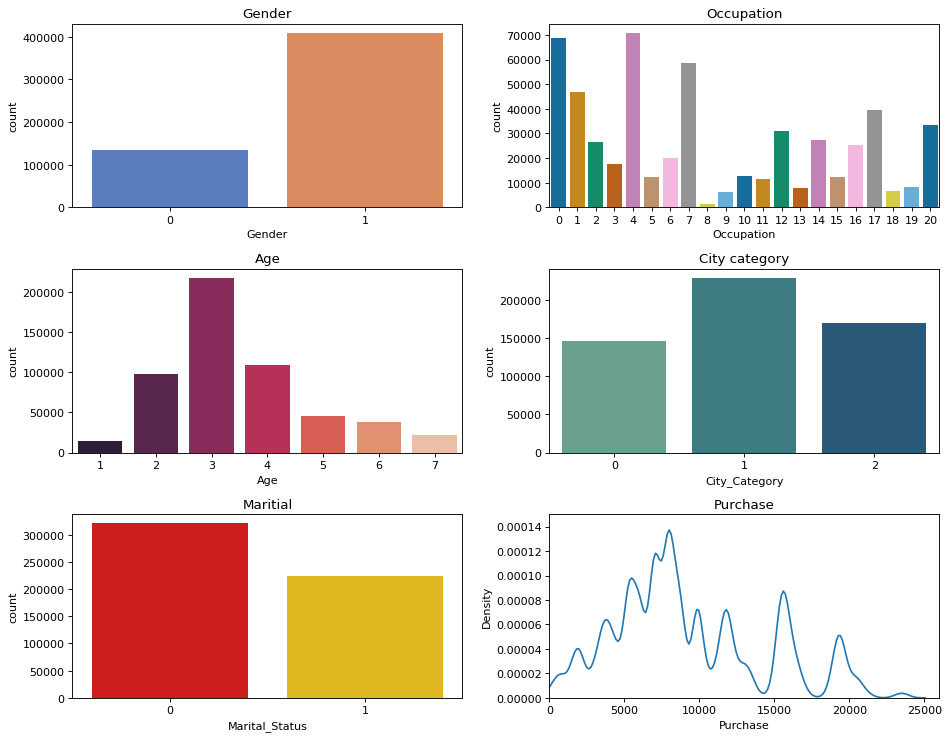

In [ ]:
# Visualizing individual column 
plt.figure(figsize=(12,12),dpi=80)
plt.subplot(4,2,1)
plt.title('Gender')
sns.countplot(x='Gender',data=df,palette='muted')

plt.subplot(4,2,3)
plt.title('Age')
sns.countplot(x='Age',data=df,palette='rocket')

plt.subplot(4,2,2)
plt.title('Occupation')
sns.countplot(df['Occupation'],palette='colorblind')

plt.subplot(4,2,4)
plt.title('City category')
sns.countplot(df['City_Category'],palette='crest')


plt.subplot(4,2,5)
plt.title('Maritial')
sns.countplot(df['Marital_Status'],palette='hot')

ax=plt.subplot(4,2,6)
plt.title('Purchase')
ax.set_ylim(0,0.00015)
ax.set_xlim(0,26000)
sns.kdeplot(df['Purchase'])



plt.tight_layout()
plt.show()

Gender:-

The graph shows that count of male is more than female.
Male count=4000
Female count=1500

Age:-

The graph shows that pepople visiting the store are maximum adults.
Adult age ranges from 26-50
Where as least visited are children.

Maritial:-

People visting the store are married and has higher count as compared to singles.
Married count = 3,00,000
Single count=2,00,000

City category:-

People visiting the store maximum belong to city category B.
Least visiting people visiting the store belong to category A.


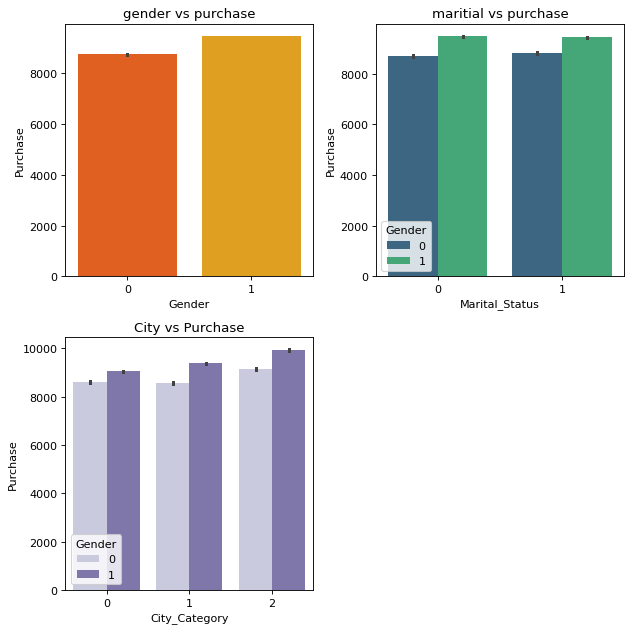

In [ ]:
# Gender wise purchase
plt.figure(figsize=(8,8),dpi=80)
plt.subplot(2,2,1)
plt.title('gender vs purchase')
sns.barplot(x='Gender',y='Purchase',data=df,palette='autumn')

plt.subplot(2,2,2)
plt.title('maritial vs purchase')
sns.barplot(x='Marital_Status',y='Purchase',hue='Gender',data=df,palette='viridis')

plt.subplot(2,2,3)
plt.title('City vs Purchase')
sns.barplot(data=df,x='City_Category',y='Purchase',hue='Gender',palette='Purples')

plt.tight_layout()
plt.show()

By these 3 ploted graph we conclude that male has higher purchase rate than female
male > female(purchase)

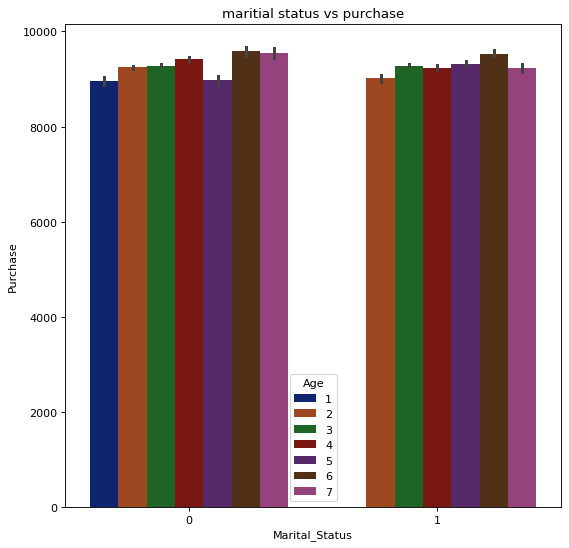

In [ ]:
# Plotting purchase vs product1
plt.figure(figsize=(8,8),dpi=80)
plt.title('maritial status vs purchase')
sns.barplot(x='Marital_Status',y='Purchase',data=df,palette='dark',hue='Age')

This graph we come to know that purchase rate is more in singles rather than in married.
In singles purchase rate of old age is higher where as in married purchase rate of old is higher.

,Age
Age,
1,14976
2,98303
3,217354
4,109151
5,45384
6,38245
7,21374


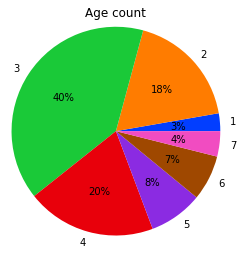

In [ ]:
#Age count
a=df.groupby('Age')['Age'].agg('count')
display(a.to_frame())
plt.title('Age count')
palette_color=sns.color_palette('bright')
plt.pie(a, colors=palette_color,labels=a.index,radius=1.2,autopct='%.0f%%')
plt.show()


Maximum people visiting the store are from adult category.
Least people visiting belong to child category.

,City_Category
City_Category,
0,146049
1,228695
2,170043


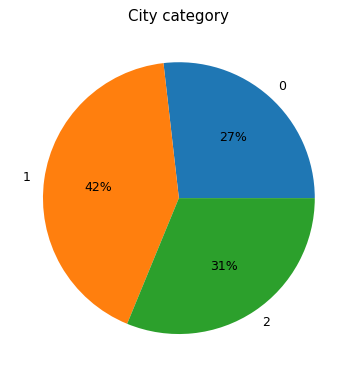

In [ ]:
#city category
plt.figure(figsize=(5,5),dpi=90)
plt.title('City category')
palette_color=sns.color_palette('bright')
b=df.groupby('City_Category')['City_Category'].agg('count')
display(b.to_frame())
plt.pie(b,labels=b.index,autopct='%.0f%%')
plt.show()

People visting the store belong to city category B.
Least visiting belong to city A.

# Assumptions

### 1) Collinearity

In [ ]:
# use the corr() function to generate the correlation matrix of the numeric variables
corrmat = df.corr()

# print the correlation matrix
corrmat

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender,1.000000,-0.003971,0.117761,-0.004577,0.014534,-0.011292,-0.046223,-0.015602,0.012655,0.061194
Age,-0.003971,1.000000,0.090541,0.122955,-0.004764,0.310828,0.061400,0.045824,0.032591,0.014970
Occupation,0.117761,0.090541,1.000000,0.034366,0.029705,0.023750,-0.007216,-0.000269,0.006647,0.020260
City_Category,-0.004577,0.122955,0.034366,1.000000,0.019880,0.039698,-0.014067,-0.010233,-0.003834,0.061174
Stay_In_Current_City_Years,0.014534,-0.004764,0.029705,0.019880,1.000000,-0.012976,-0.004023,-0.001424,0.001028,0.005316
Marital_Status,-0.011292,0.310828,0.023750,0.039698,-0.012976,1.000000,0.020150,0.012833,0.011305,-0.001193
Product_Category_1,-0.046223,0.061400,-0.007216,-0.014067,-0.004023,0.020150,1.000000,0.381879,0.112622,-0.342829
Product_Category_2,-0.015602,0.045824,-0.000269,-0.010233,-0.001424,0.012833,0.381879,1.000000,0.351201,-0.183453
Product_Category_3,0.012655,0.032591,0.006647,-0.003834,0.001028,0.011305,0.112622,0.351201,1.000000,-0.033240
Purchase,0.061194,0.014970,0.020260,0.061174,0.005316,-0.001193,-0.342829,-0.183453,-0.033240,1.000000


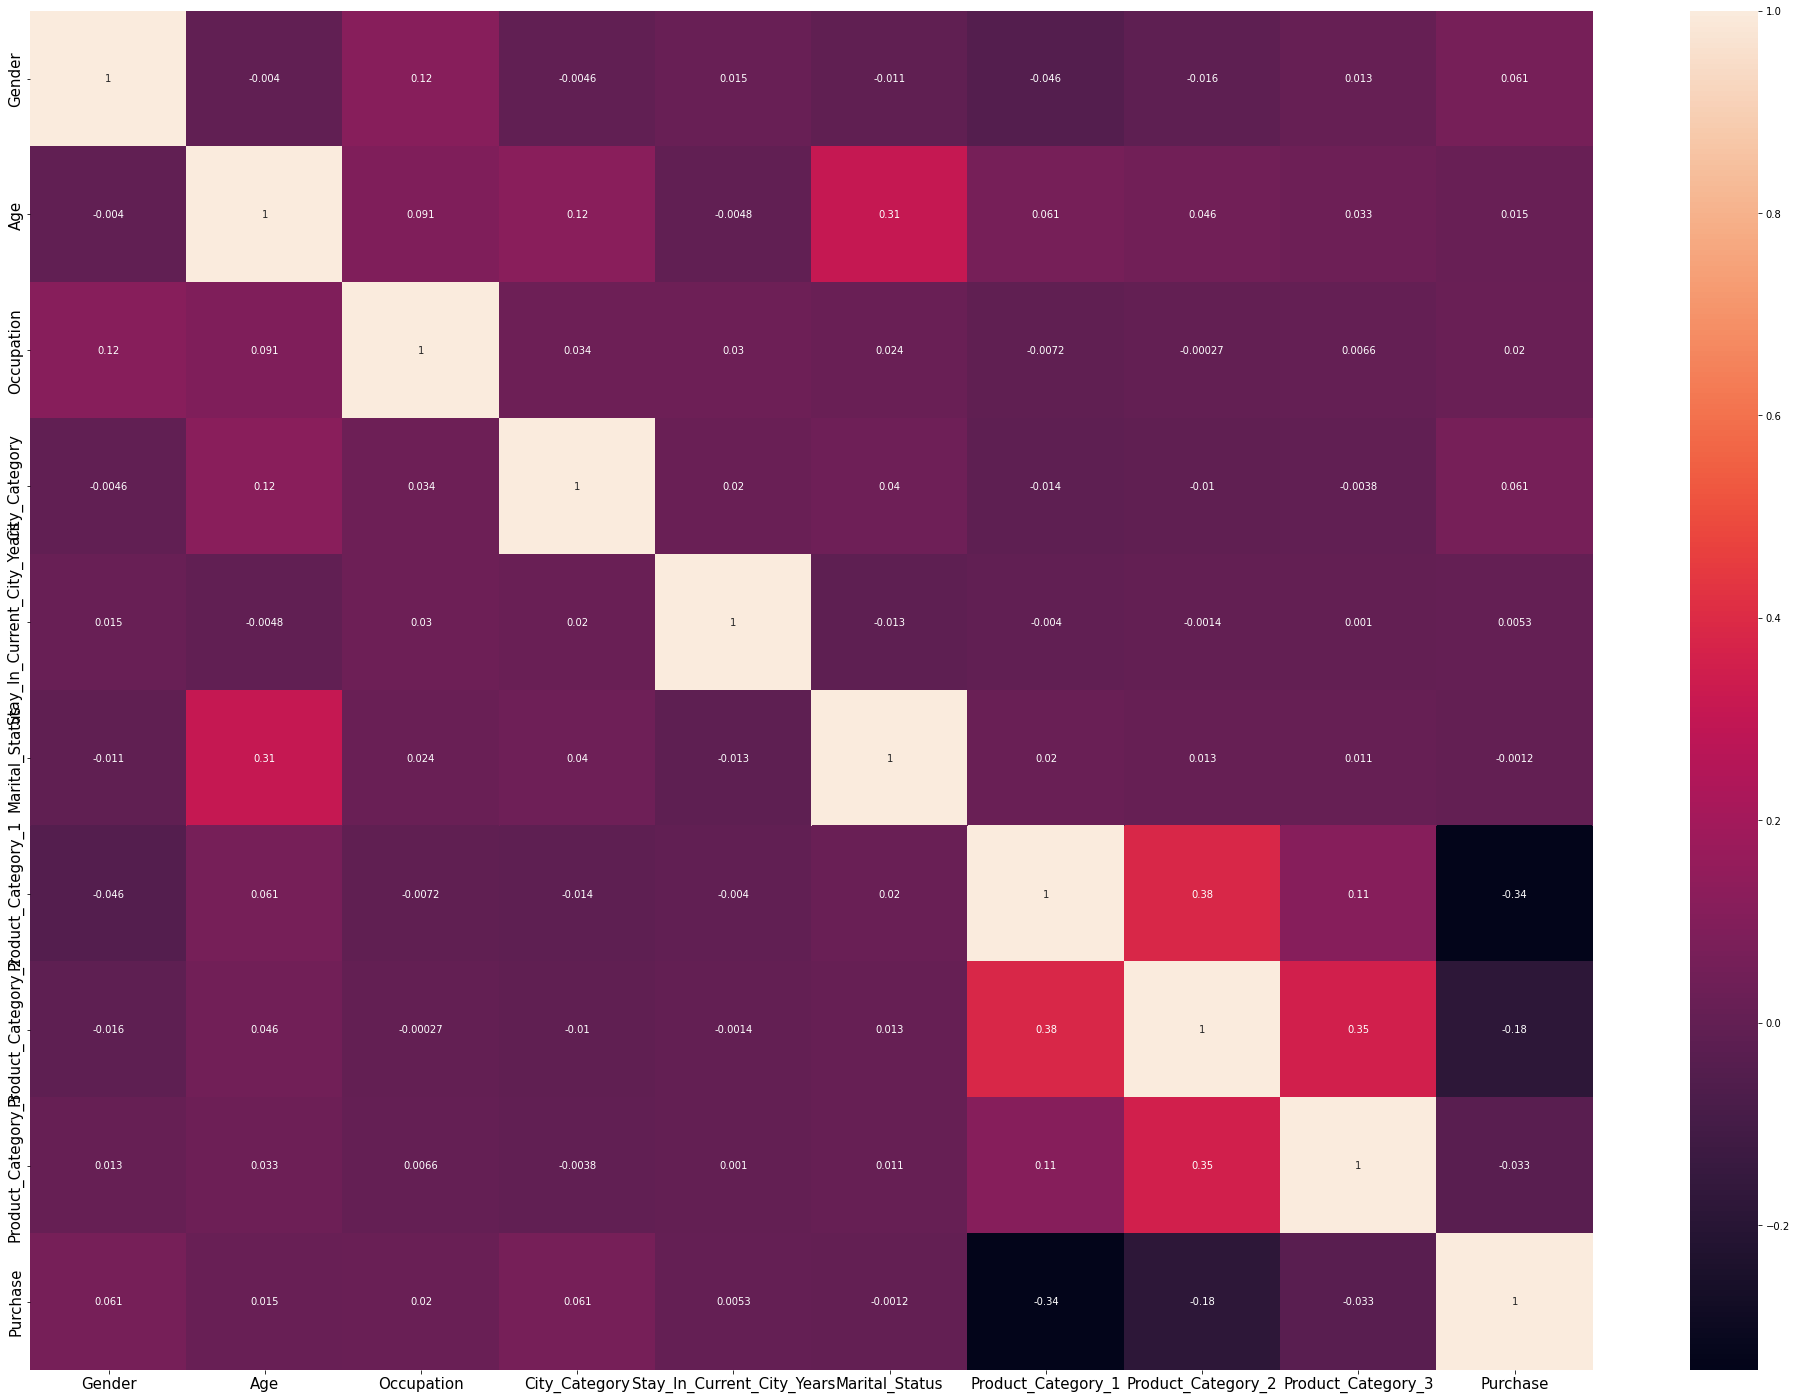

In [ ]:
# set the plot size
plt.figure(figsize = (35,25))

# plot the heat map

sns.heatmap(corrmat, annot = True, annot_kws = {"size": 10})

# set the size of x and y axes labels using 'fontsize'
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)


plt.show()

We can see that Product Category 1 and 
Purchase Amount are Slightly negatively coo-
Related to each other. 
##### And Product Category 2 and Product Category 1 are Slightly Positively Co-orelated to each other


### 2) Normality

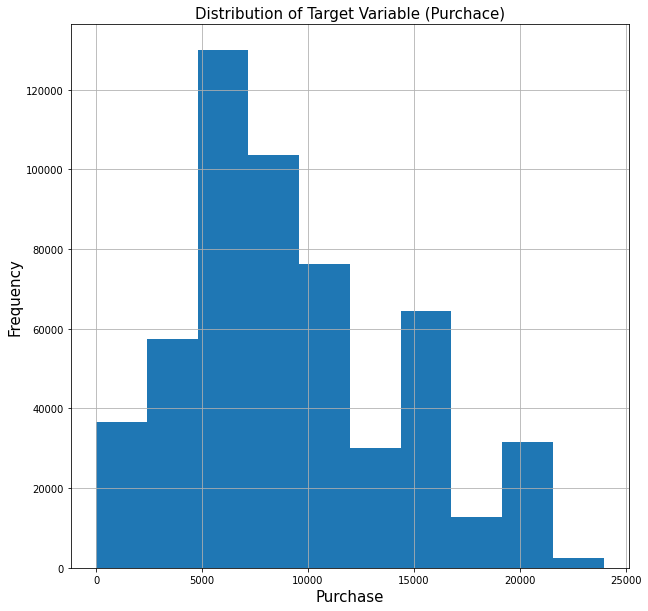

In [ ]:
# Check Normality Distribution for Target Column

df.Purchase.hist(figsize=(10,10))
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (Purchace)', fontsize = 15)
plt.xlabel('Purchase', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

In [ ]:
# Checking Skewiness for Purchase Column
df.Purchase.skew()

0.5927919373594053

We see that the variable ‘  Purchase ‘ is slightly 
right skewed and thus we can say that it is nearly 
Normally distributed.
#####As in real life Datasets its impossible to get perfectly Normally distributed Data


### 3) Linearity

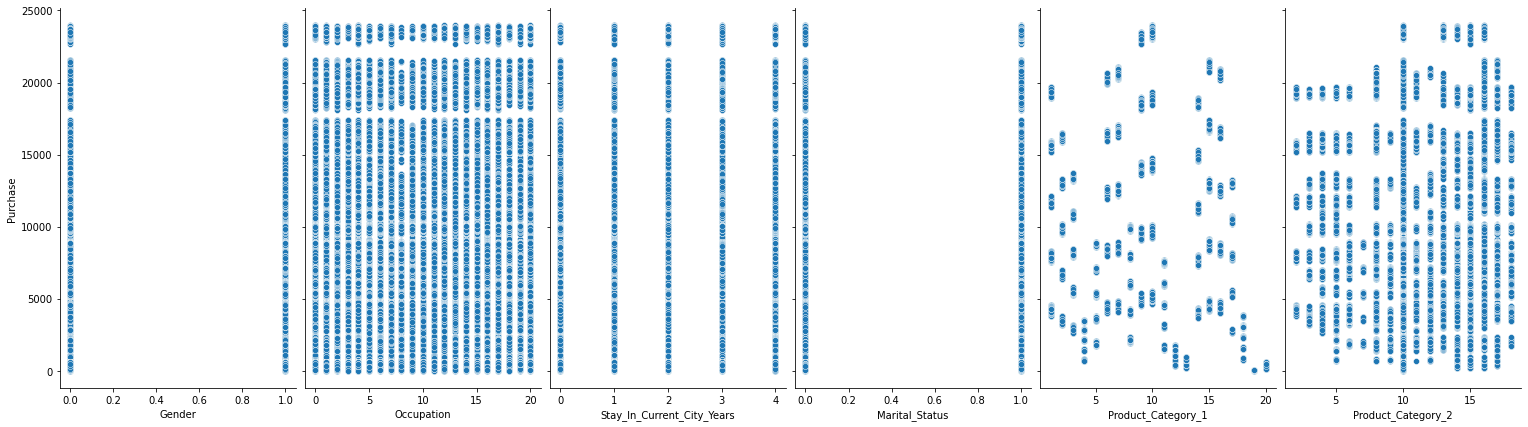

In [ ]:
## Check Linearity for Target column vs Gender, Age, Occupation, City_Category,Stay_In_Current_City_Years 
# Marital_Status, Product_Category_1,Product_Category_2, Product_Category_3


plt.rcParams['figure.figsize'] = [30,45]
p = sns.pairplot(df, x_vars=['Gender', 'Occupation','Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1','Product_Category_2'], y_vars='Purchase', size=6, aspect=0.6)

From the pair plot we can see that there is no linear relationship between independent and dependent variable.
######From the above plots we observe that there is not much linear relationship between the target variable and and other variables such as ‘Gender’ , ‘Occupation’ , ‘City’, ‘Material_Status’ ,’Product_Category_1 and 2.

#Splitting into train and test data

In [ ]:
# Train Test Split

X = df.drop(['Purchase'], axis = 1)
y = df['Purchase']

# split data into train data and test data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

# check the dimensions of the train & test subset for 

print("The shape of X_train is:",X_train.shape)

print("The shape of X_test is:",X_test.shape)

print("The shape of y_train is:",y_train.shape)

print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (381350, 9)
The shape of X_test is: (163437, 9)
The shape of y_train is: (381350,)
The shape of y_test is: (163437,)


### Scaling

In [ ]:
# Scaling the Data using Standard Scaler Method 

sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

Scaling is a method used to normalize the range of features

# Model Building

In [ ]:
# Libaries for Model Building 

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

#Model Application

In [ ]:
# Model Building 
models=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),KNeighborsRegressor()]

In [ ]:
for i in range(5):
    models[i].fit(X_train_scaled,y_train)
    
    print(f'{models[i]}: ')
    y_pred_train=models[i].predict(X_train_scaled)
    y_pred_test=models[i].predict(X_test_scaled)
    
    print('MSE_train: ',mean_squared_error(y_train,y_pred_train))
    print('MSE_test: ',mean_squared_error(y_test,y_pred_test))
    
    print('RMSE_train: ',np.sqrt(mean_squared_error(y_train,y_pred_train)))
    print('RMSE_test: ',np.sqrt(mean_squared_error(y_test,y_pred_test)))
    
    print('R2_score_train: ',r2_score(y_train,y_pred_train))
    print('R2_score_test: ',r2_score(y_test,y_pred_test))
    
    print()

LinearRegression(): 
MSE_train:  22129164.952517007
MSE_test:  22056697.670131456
RMSE_train:  4704.164639180585
RMSE_test:  4696.455862683206
R2_score_train:  0.12732544995385786
R2_score_test:  0.12838938592633187

DecisionTreeRegressor(): 
MSE_train:  4907952.479003752
MSE_test:  11380012.863133894
RMSE_train:  2215.3899157944525
RMSE_test:  3373.4274652249296
R2_score_train:  0.8064524698309826
R2_score_test:  0.5502980478698624

RandomForestRegressor(): 
MSE_train:  5204763.051724099
MSE_test:  9438647.88596152
RMSE_train:  2281.394979332623
RMSE_test:  3072.238253450002
R2_score_train:  0.7947475982936495
R2_score_test:  0.6270146237236329

GradientBoostingRegressor(): 
MSE_train:  8945344.316294912
MSE_test:  8974594.225425018
RMSE_train:  2990.8768473969153
RMSE_test:  2995.762711802291
R2_score_train:  0.6472359285594024
R2_score_test:  0.6453525500112602

KNeighborsRegressor(): 
MSE_train:  9061777.692499278
MSE_test:  12771081.739619058
RMSE_train:  3010.2786735615155
RMSE_t

# Conclusion

We see that the variable ‘  Purchase ‘ is slightly 
Left skewed and thus we can say that it is nearly 
Normally distributed.
As in real life Datasets its impossible to get perfectly 
Normally distributed Data
